### Importando Libraries

In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Facebook Libraries
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics


#Plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


#### Importando dataset
- Registro de criminalidade do RJ

In [37]:
df = pd.read_csv('D:\Lipe_1\Datasets\BaseDPEvolucaoMensalCisp.csv', sep=';', encoding='ISO-8859-1')

In [38]:
df.head()

,CISP,mes,vano,mes_ano,area_cisp,AISP,RISP,munic,mcirc,Regiao,...,apreensoes,gaai,aaapai_cmba,registro_ocorrencias,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
0,1,1,2003,2003m1,"3,5",5,1,Rio de Janeiro,3304557,Capital,...,NaN,NaN,NaN,578,0,0,0,66,5,3
1,4,1,2003,2003m1,"3,8",5,1,Rio de Janeiro,3304557,Capital,...,NaN,NaN,NaN,441,0,0,3,51,9,3
2,5,1,2003,2003m1,3,5,1,Rio de Janeiro,3304557,Capital,...,NaN,NaN,NaN,637,0,0,3,64,11,3
3,6,1,2003,2003m1,6,1,1,Rio de Janeiro,3304557,Capital,...,NaN,NaN,NaN,473,0,0,6,56,27,3
4,7,1,2003,2003m1,"5,2",1,1,Rio de Janeiro,3304557,Capital,...,NaN,NaN,NaN,147,0,0,4,5,23,3


In [39]:
df.tail()

,CISP,mes,vano,mes_ano,area_cisp,AISP,RISP,munic,mcirc,Regiao,...,apreensoes,gaai,aaapai_cmba,registro_ocorrencias,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
23180,159,6,2017,2017m6,"953,8",35,4,Cachoeiras de Macacu,3300803,Interior,...,NaN,3.0,3.0,110,0,0,4,8,3,2
23181,165,6,2017,2017m6,"356,4",33,5,Mangaratiba,3302601,Interior,...,NaN,2.0,2.0,164,0,0,1,11,6,2
23182,166,6,2017,2017m6,"825,1",33,5,Angra dos Reis,3300100,Interior,...,NaN,2.0,2.0,443,0,0,12,37,15,2
23183,167,6,2017,2017m6,"925,1",33,5,Paraty,3303807,Interior,...,NaN,2.0,2.0,157,0,0,3,7,4,2
23184,168,6,2017,2017m6,"837,3",33,5,Rio Claro,3304409,Interior,...,NaN,0.0,1.0,56,0,0,0,0,0,2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23185 entries, 0 to 23184
Data columns (total 61 columns):
CISP                         23185 non-null int64
mes                          23185 non-null int64
vano                         23185 non-null int64
mes_ano                      23185 non-null object
area_cisp                    23185 non-null object
AISP                         23185 non-null int64
RISP                         23185 non-null int64
munic                        23185 non-null object
mcirc                        23185 non-null int64
Regiao                       23185 non-null object
hom_doloso                   23185 non-null int64
lesao_corp_morte             23185 non-null int64
latrocinio                   23185 non-null int64
tentat_hom                   23185 non-null int64
lesao_corp_dolosa            23185 non-null int64
estupro                      23185 non-null int64
hom_culposo                  23185 non-null int64
lesao_corp_culposa           23185 no

In [41]:
df.describe()

,CISP,mes,vano,AISP,RISP,mcirc,hom_doloso,lesao_corp_morte,latrocinio,tentat_hom,...,apreensoes,gaai,aaapai_cmba,registro_ocorrencias,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
count,23185.000000,23185.000000,23185.000000,23185.000000,23185.000000,2.318500e+04,23185.000000,23185.000000,23185.000000,23185.000000,...,15959.000000,4140.000000,4140.000000,23185.000000,23185.000000,23185.000000,23185.000000,23185.000000,23185.000000,23185.000000
mean,81.731551,6.396765,2009.869140,19.777097,3.872978,3.821789e+06,3.382661,0.027561,0.114557,2.916455,...,2.304530,5.822705,6.131884,424.833987,0.015484,0.002631,4.076989,46.946301,18.940436,2.982144
std,48.312374,3.450548,4.191577,11.300746,2.013572,1.789235e+06,4.870374,0.181934,0.407812,3.989014,...,5.084854,7.272753,7.521412,377.314480,0.143204,0.052884,5.743705,65.879528,31.185847,0.132432
min,1.000000,1.000000,2003.000000,1.000000,1.000000,3.300100e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,38.000000,3.000000,2006.000000,10.000000,2.000000,3.302700e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,101.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,78.000000,6.000000,2010.000000,19.000000,4.000000,3.304557e+06,1.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,3.000000,356.000000,0.000000,0.000000,2.000000,15.000000,4.000000,3.000000
75%,125.000000,9.000000,2013.000000,30.000000,6.000000,3.304557e+06,5.000000,0.000000,0.000000,4.000000,...,2.000000,8.000000,9.000000,647.000000,0.000000,0.000000,6.000000,75.000000,25.000000,3.000000
max,168.000000,12.000000,2017.000000,41.000000,7.000000,9.999999e+06,43.000000,6.000000,9.000000,59.000000,...,61.000000,53.000000,56.000000,2507.000000,4.000000,2.000000,52.000000,711.000000,317.000000,3.000000


#### Pre Processamento de features
- Se fosse um processo tradicional de Time Series, precisariamos nos atentar a diversos detalhes, como:
    - Coluna de data do tipo datetime deve ser atribuída como índice
    - Transformação da medida em análise
    - Resample do dataset (Anual, Mensal, Diário, Hora, Minuto)
    - Análise de ACF e PACF
    - Teste Estatístico comprovação de hipótese de Estacionaridade ( Augmented Dickey-Fuller ou KPSS (Vodcka Test))
    - Teste Estatístico para comprovação de hipótese da distribuição Normal
    - Análise de Sasonalidade e Tendência
    - Validação dos resultados obtidos, comparando o resultado com a medida original (Train e Test e reversão da medida transformada para sua escala original)

### Com o Prophet iremos
- Organizar o dataset com as colunas ds e y, onde ds (data da serie) e y (valor a ser previsto)
- Agrupar e testar diversos agrupamentos diferentes ( Definido pelo Negócio a ser Modelado)
- Atribuir os dados ao Prophet, e analisar os resultados.
- Realizar tratamentos necessários como:
    - Excluir/Substituir NaN values
    - Identificar e agir contra outliers
    - Validar resultados com cross validation
    - Ajustar tipos de parametros de acordo com a alteração do agrupamento de tempo

In [42]:
# Ajustando mes_ano values
df.mes_ano = [x.strip().replace('m', '/') for x in df.mes_ano]

#Convertendo data type para datetime
df['mes_ano'] = pd.to_datetime(df['mes_ano'],format='%Y/%m')

In [43]:
#Gerando data set final
dataset = df[['mes_ano','registro_ocorrencias']]

In [44]:
dataset.head()

,mes_ano,registro_ocorrencias
0,2003-01-01,578
1,2003-01-01,441
2,2003-01-01,637
3,2003-01-01,473
4,2003-01-01,147


In [45]:
#dataset = dataset.set_index(dataset.mes_ano)
#Downsample from daily to monthly data
#dataset =  dataset.resample(rule='M', kind='timestamp').last()

In [46]:
#dataset = dataset['registro_ocorrencias'].sum()
dataset = pd.DataFrame(dataset.groupby(['mes_ano'], as_index=False)['registro_ocorrencias'].sum())

In [47]:
dataset.head()

,mes_ano,registro_ocorrencias
0,2003-01-01,44793
1,2003-02-01,45403
2,2003-03-01,45417
3,2003-04-01,44184
4,2003-05-01,45572


In [48]:
dataset.tail()

,mes_ano,registro_ocorrencias
169,2017-02-01,31231
170,2017-03-01,60412
171,2017-04-01,67964
172,2017-05-01,71896
173,2017-06-01,67337


#### Processo de EDA, entendendo os dados

In [49]:
trace_high = go.Scatter(
    x=dataset.mes_ano,
    y=dataset.registro_ocorrencias,
    name = "Registros de Ocorrencias",
    line = dict(color = '#17BECF'),
    opacity = 0.8)



data = [trace_high]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [50]:
#Renomeando as colunas para atender ao padrão requisitado pelo Prophet
dataset = dataset.rename(columns={'mes_ano':'ds','registro_ocorrencias':'y'})

In [51]:
dataset['ds'] = pd.to_datetime(dataset['ds'])

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 2 columns):
ds    174 non-null datetime64[ns]
y     174 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.1 KB


### Separando o Data Set para melhor entendimento dos resultados do modelo

In [53]:
train = dataset[:int(((len(dataset))*80)/100)]
test = dataset[int(((len(dataset))*80)/100):]

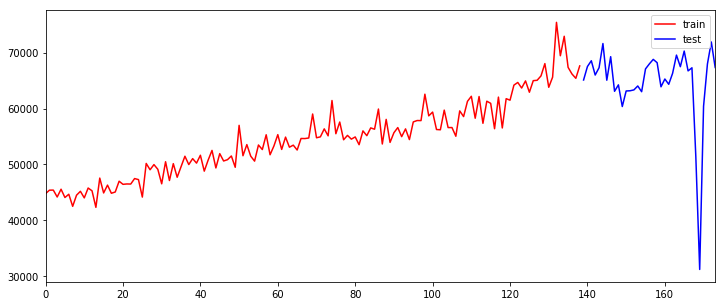

In [54]:
train['y'].plot(color='red', figsize=(12,5), label='train')
test['y'].plot(color='blue', label='test')
plt.legend()
plt.show()

### Instânciando classe Prophet
- Aplicando dados de treinamento
- Requisitando a geração de forecasting de dados futuros

In [63]:
from datetime import date
import holidays

br_holidays = pd.DataFrame(columns=['holiday','ds'])
ds= []
holiday = []

years = [i for i in range(2002,2020)]

for date, name in sorted(holidays.BR(state='RJ', years=years).items()):
    ds.append(date)
    holiday.append(name)
    
    
br_holidays['holiday'] = holiday
br_holidays['ds'] = ds

In [65]:
m = Prophet(yearly_seasonality = True,\
            weekly_seasonality=False,\
            daily_seasonality=False,
            holidays = br_holidays, seasonality_prior_scale=0.1)
m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='M')
forecast = m.predict(future)

In [66]:
# Resultado do forecasting realizado
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-01,43329.588689,42540.157184,46269.138900,43329.588689,43329.588689,-657.88338,-657.88338,-657.88338,0.0,...,-657.883380,-657.883380,-657.883380,1758.440179,1758.440179,1758.440179,0.0,0.0,0.0,44430.145488
1,2003-02-01,43504.704128,41389.205360,45056.490556,43504.704128,43504.704128,0.00000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,-250.051942,-250.051942,-250.051942,0.0,0.0,0.0,43254.652186
2,2003-03-01,43662.872912,45691.163810,49465.691742,43662.872912,43662.872912,0.00000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,3892.747772,3892.747772,3892.747772,0.0,0.0,0.0,47555.620684
3,2003-04-01,43837.988351,41660.649633,45390.269916,43837.988351,43837.988351,0.00000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,-297.923366,-297.923366,-297.923366,0.0,0.0,0.0,43540.064985
4,2003-05-01,44007.454905,43074.196579,46683.983504,44007.454905,44007.454905,0.00000,0.00000,0.00000,0.0,...,83.920429,83.920429,83.920429,891.209669,891.209669,891.209669,0.0,0.0,0.0,44982.585003


### Verificando Tendencia e Sazonalidade

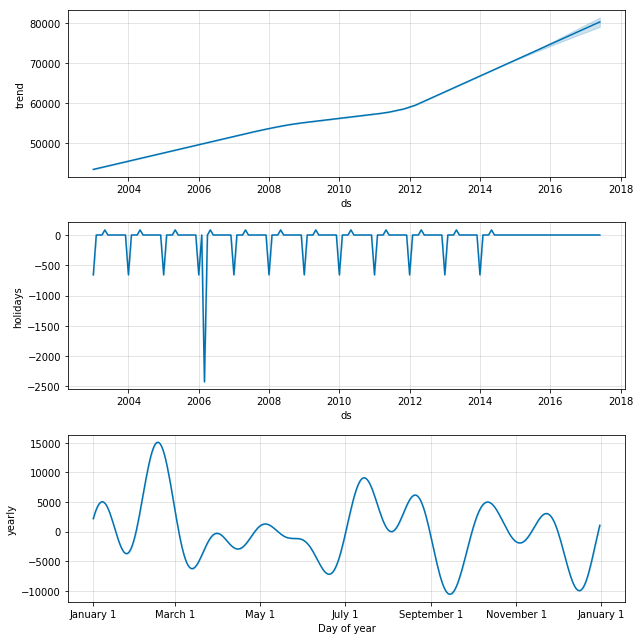

In [67]:
m.plot_components(forecast)
plt.show()

In [68]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
169,2017-01-31,78919.292554,75869.895450,80342.987819,77878.020202,79859.748067,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-739.422259,-739.422259,-739.422259,0.0,0.0,0.0,78179.870295
170,2017-02-28,79223.549085,81548.887860,86009.310833,78129.401457,80202.839139,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4591.335011,4591.335011,4591.335011,0.0,0.0,0.0,83814.884097
171,2017-03-31,79560.404531,76956.429466,81410.357424,78406.316840,80572.330410,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-286.396730,-286.396730,-286.396730,0.0,0.0,0.0,79274.007801
172,2017-04-30,79886.393672,78264.055388,82788.841139,78690.922733,80944.879940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,789.238066,789.238066,789.238066,0.0,0.0,0.0,80675.631737
173,2017-05-31,80223.249117,76646.032285,81047.323452,78985.432554,81330.116115,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1343.431412,-1343.431412,-1343.431412,0.0,0.0,0.0,78879.817705


#### Verificando Forecasting
- Comparando Teste e a Predição gerada

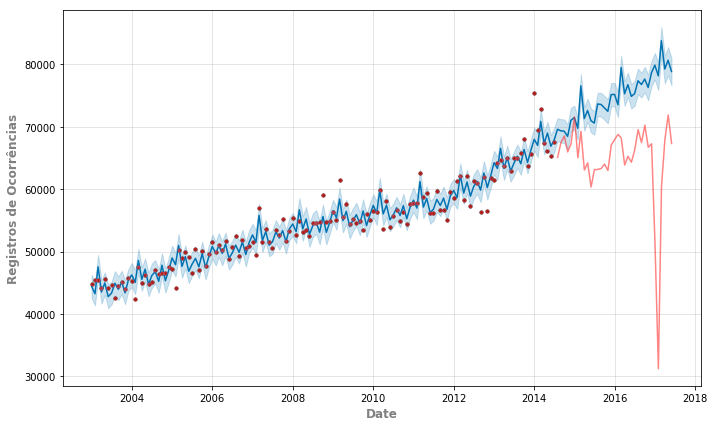

In [69]:
m.plot(forecast)
plt.plot(train.ds,train.y,'.',color='#ff3333',alpha=0.6, label='train')
plt.plot(test.ds,test.y,'-',color='#ff3333',alpha=0.6,label='test')
plt.xlabel('Date',fontsize=12,fontweight='bold',color='gray')
plt.ylabel('Registros de Ocorrências',fontsize=12,fontweight='bold',color='gray')
plt.show()

### Verificando Resultados com modo sazonal multiplicativo
- Por default PROPHET utiliza de modelo aditivo para realizar suas previsões, significa que ele adiciona o valor de efeito da sazonalidade a tendência para fazer suas previsões.
- Podemos modificar este efeito para que o mesmo seja multiplicativo ao invés de aditivo

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


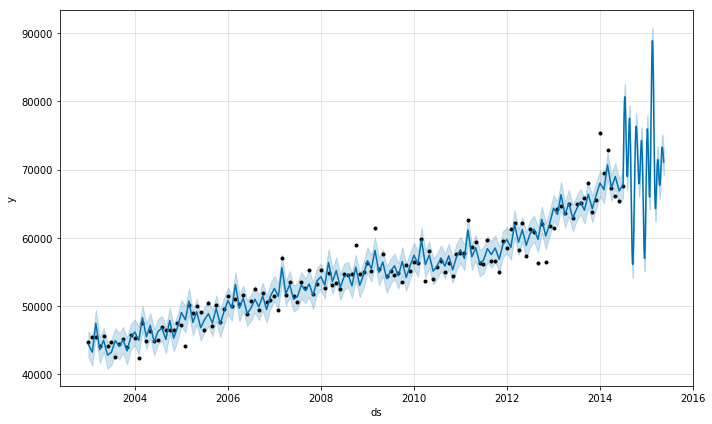

In [76]:
m = Prophet().fit(train)
future = m.make_future_dataframe(periods=320)
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


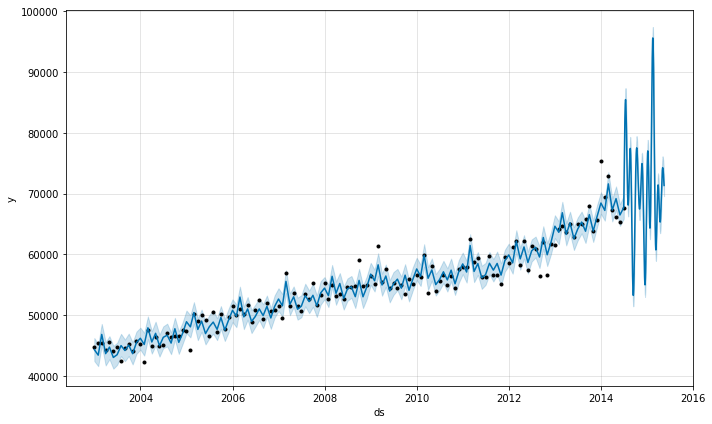

In [77]:
m = Prophet(seasonality_mode='multiplicative').fit(train)
future = m.make_future_dataframe(periods=320)
fcst = m.predict(future)
fig = m.plot(fcst)

### Novamente analisando tendencia e sazonalidade

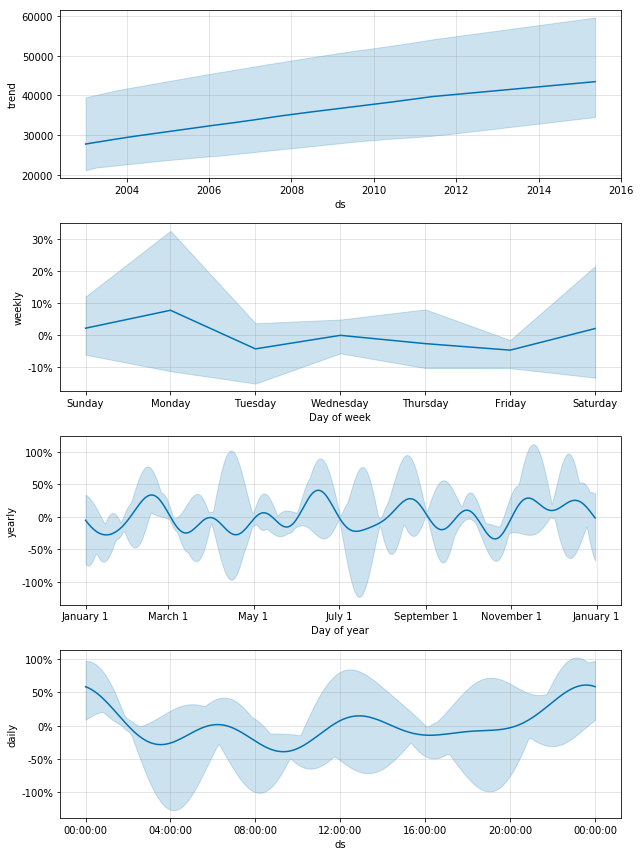

In [79]:
m = Prophet(weekly_seasonality=True,daily_seasonality=True,seasonality_mode='multiplicative', mcmc_samples=4).fit(train)
fcst = m.predict(future)
fig = m.plot_components(fcst)

In [93]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='60 days', period='2 days', horizon = '2 days')
df_cv.head()

INFO:fbprophet:Making 136 forecasts with cutoffs between 2003-03-30 00:00:00 and 2014-06-29 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 2.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.0.
INFO:fbprophet:n_changepoints greater than number of

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2003-04-01,26139.795086,-73249.583053,124716.987519,44184,2003-03-30
1,2003-05-01,-9180.308387,-68795.477573,84932.990925,45572,2003-04-29
2,2003-06-01,28337.137919,-182076.845185,398931.458710,44092,2003-05-30
3,2003-07-01,57161.242587,-24770.029933,77346.739225,44673,2003-06-29
4,2003-08-01,101573.132083,2095.033264,132107.447968,42511,2003-07-30


In [94]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2003-04-01,26139.795086,-73249.583053,124716.987519,44184,2003-03-30
1,2003-05-01,-9180.308387,-68795.477573,84932.990925,45572,2003-04-29
2,2003-06-01,28337.137919,-182076.845185,398931.458710,44092,2003-05-30
3,2003-07-01,57161.242587,-24770.029933,77346.739225,44673,2003-06-29
4,2003-08-01,101573.132083,2095.033264,132107.447968,42511,2003-07-30


In [95]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
131,2014-03-01,58320.985888,4764.925211,103400.215067,72915,2014-02-27
132,2014-04-01,72276.604951,611.928366,134122.397689,67358,2014-03-30
133,2014-05-01,89015.755850,47851.287602,105550.173707,66175,2014-04-29
134,2014-06-01,58031.580979,-5465.834802,119289.859869,65397,2014-05-30
135,2014-07-01,72183.129670,37593.444691,99140.955414,67615,2014-06-29


In [96]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
88,2 days,1.271800e+08,11277.412629,8300.852685,0.151239,1.0
87,2 days,1.022201e+08,10110.394294,6994.019531,0.121283,1.0
86,2 days,1.413093e+08,11887.359066,8105.364302,0.142479,1.0
100,2 days,1.567332e+08,12519.314738,8945.054487,0.156245,1.0
85,2 days,1.772877e+08,13314.943255,9560.244529,0.167212,1.0


#### Making Forecast using all dataset

In [101]:
m = Prophet(yearly_seasonality = True,weekly_seasonality=False,\
            daily_seasonality=False,holidays = br_holidays, seasonality_prior_scale=0.1)
m.fit(dataset)
future = m.make_future_dataframe(periods=len(test), freq='M')
forecast = m.predict(future)


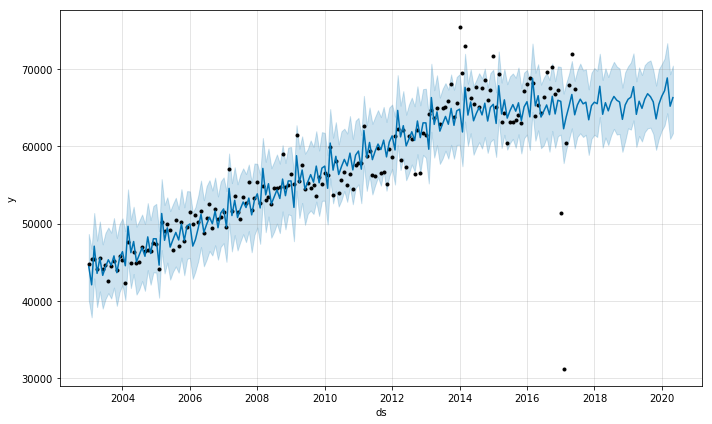

In [102]:
fig = m.plot(forecast)

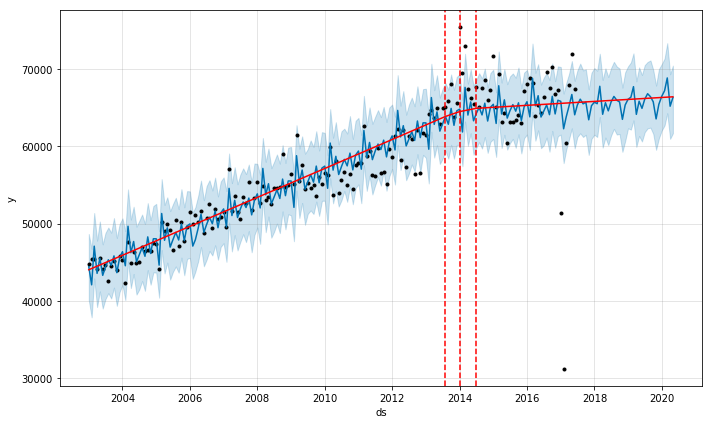

In [103]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
